Rainfall data columns: ['end_time', 'duration_hours', 'rainfall_in_mm', 'flood_status', 'station_id', 'station_name']
Water level data columns: ['recorded_at', 'unit', 'water_level', 'flood_status', 'station_name']
Rainfall data loaded: 3711 rows
Stations: ['glencourse' 'hanwella' 'kithulgala']
Water level data loaded: 9868 rows
Stations: ['glencourse' 'hanwella' 'kithulgala' 'nagalagam']
Using 'end_time' as time column for rainfall data
Available columns: ['recorded_at', 'unit', 'water_level', 'flood_status', 'station_name']
Generating rainfall visualizations by year...


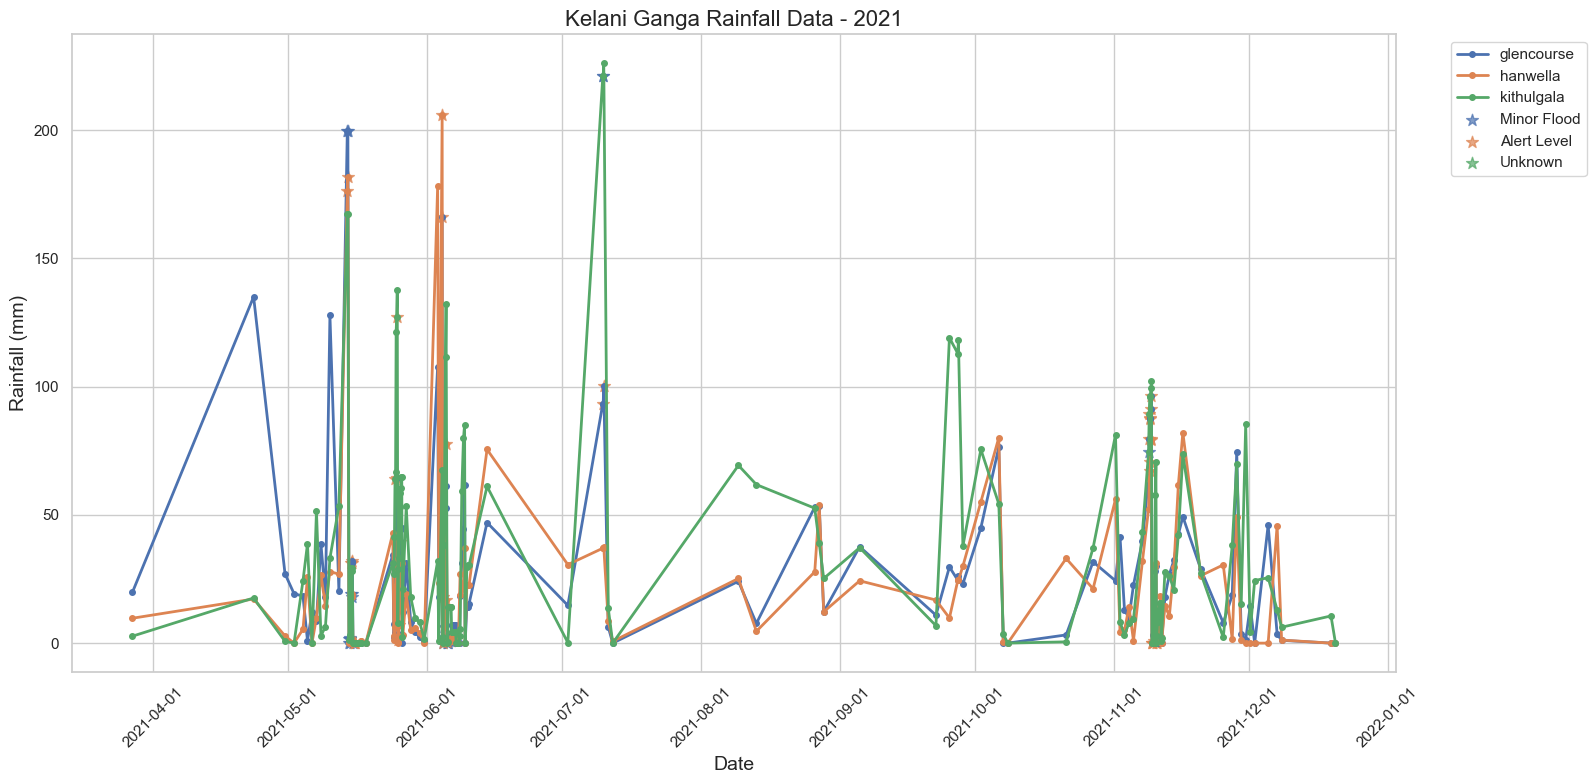

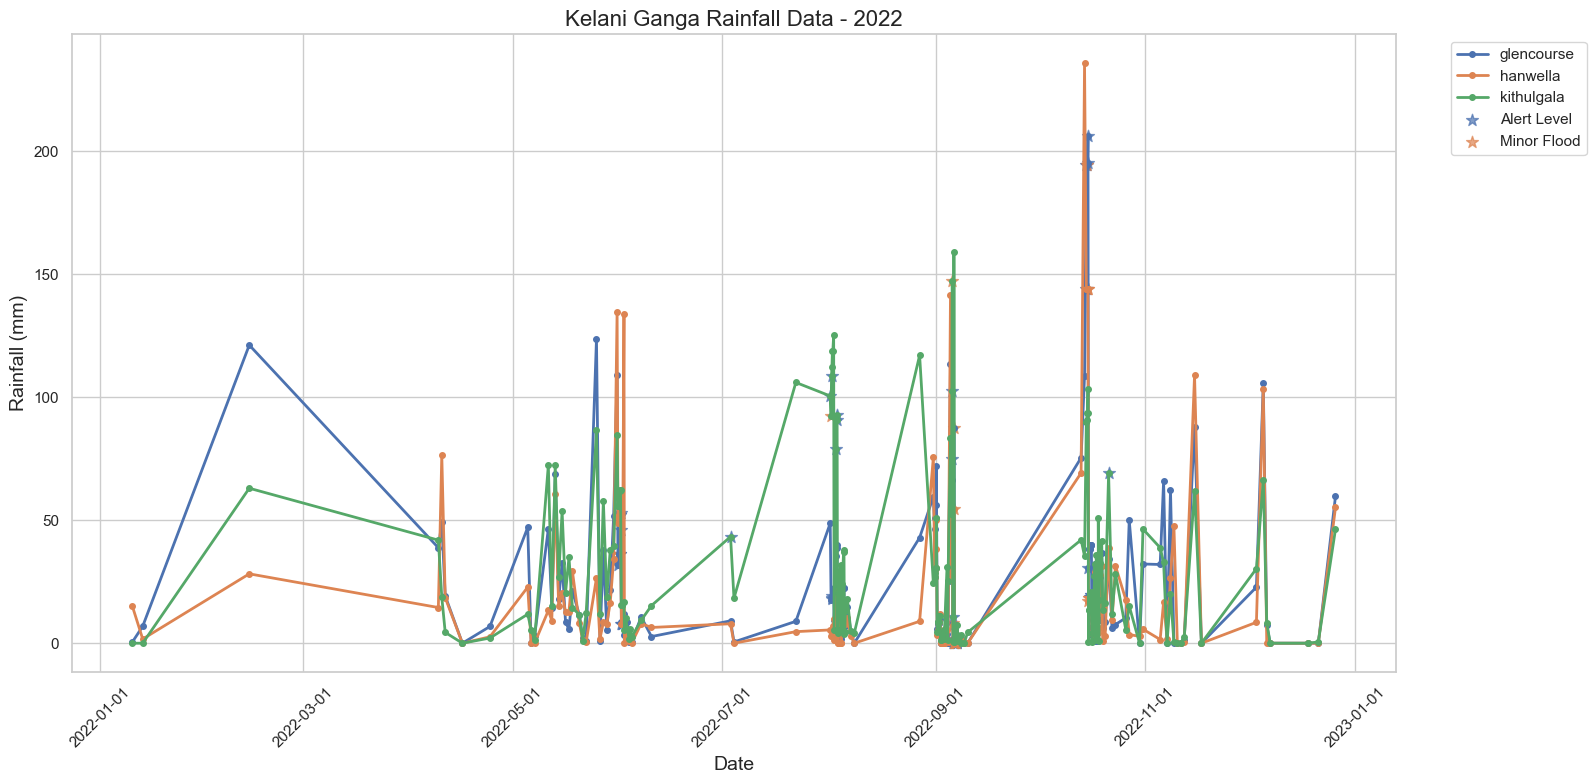

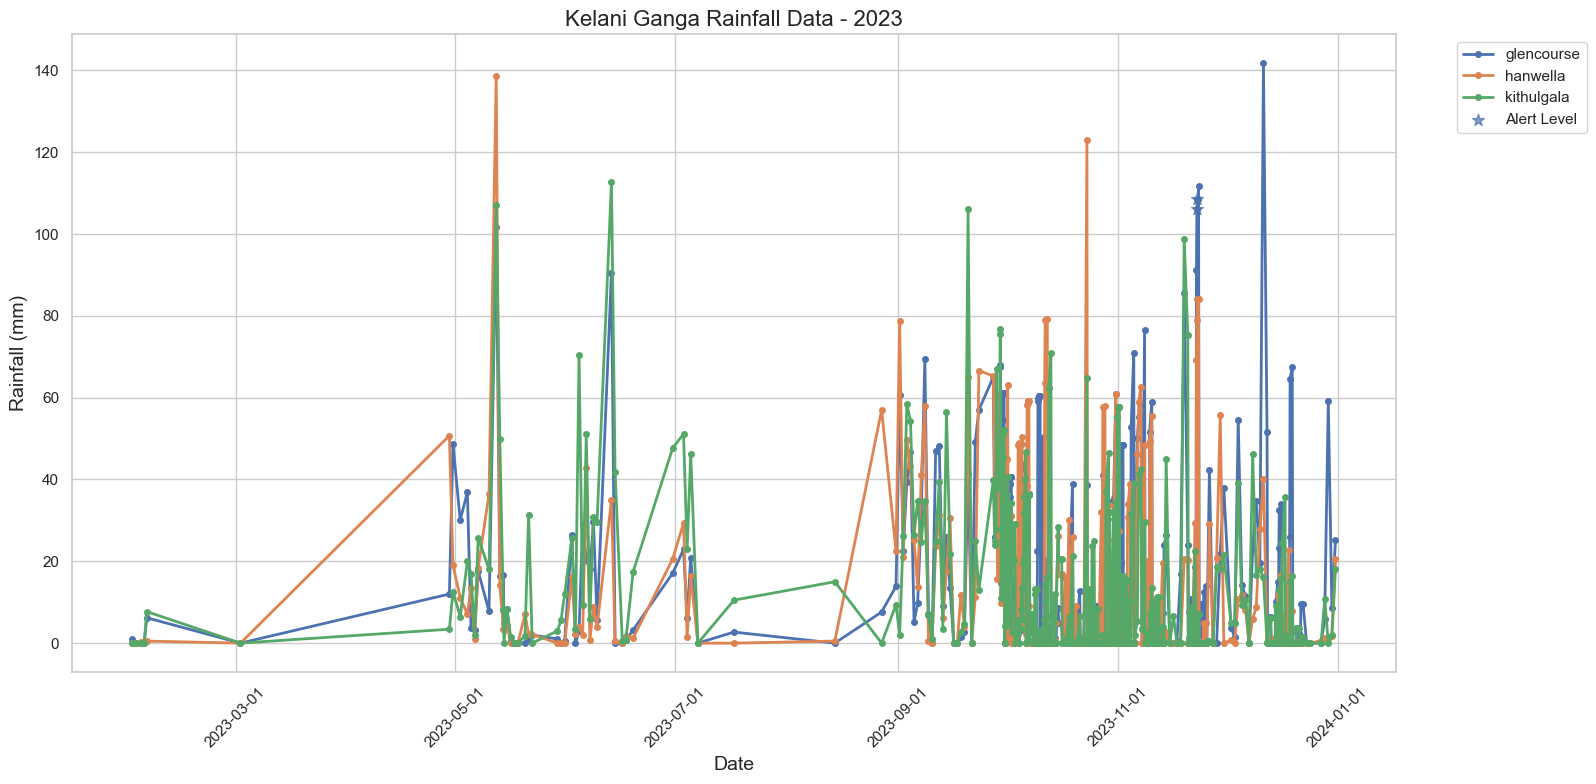

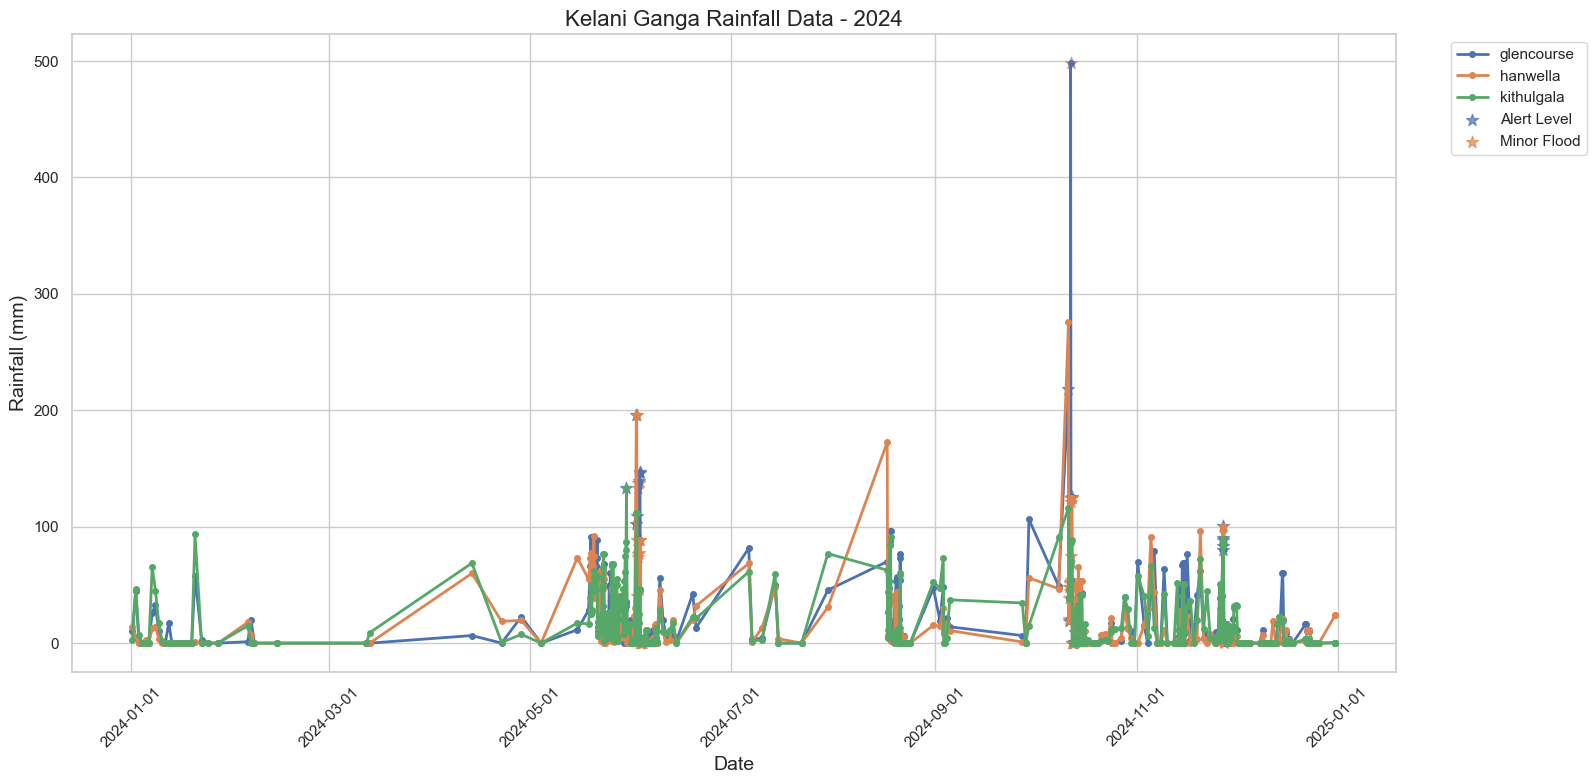

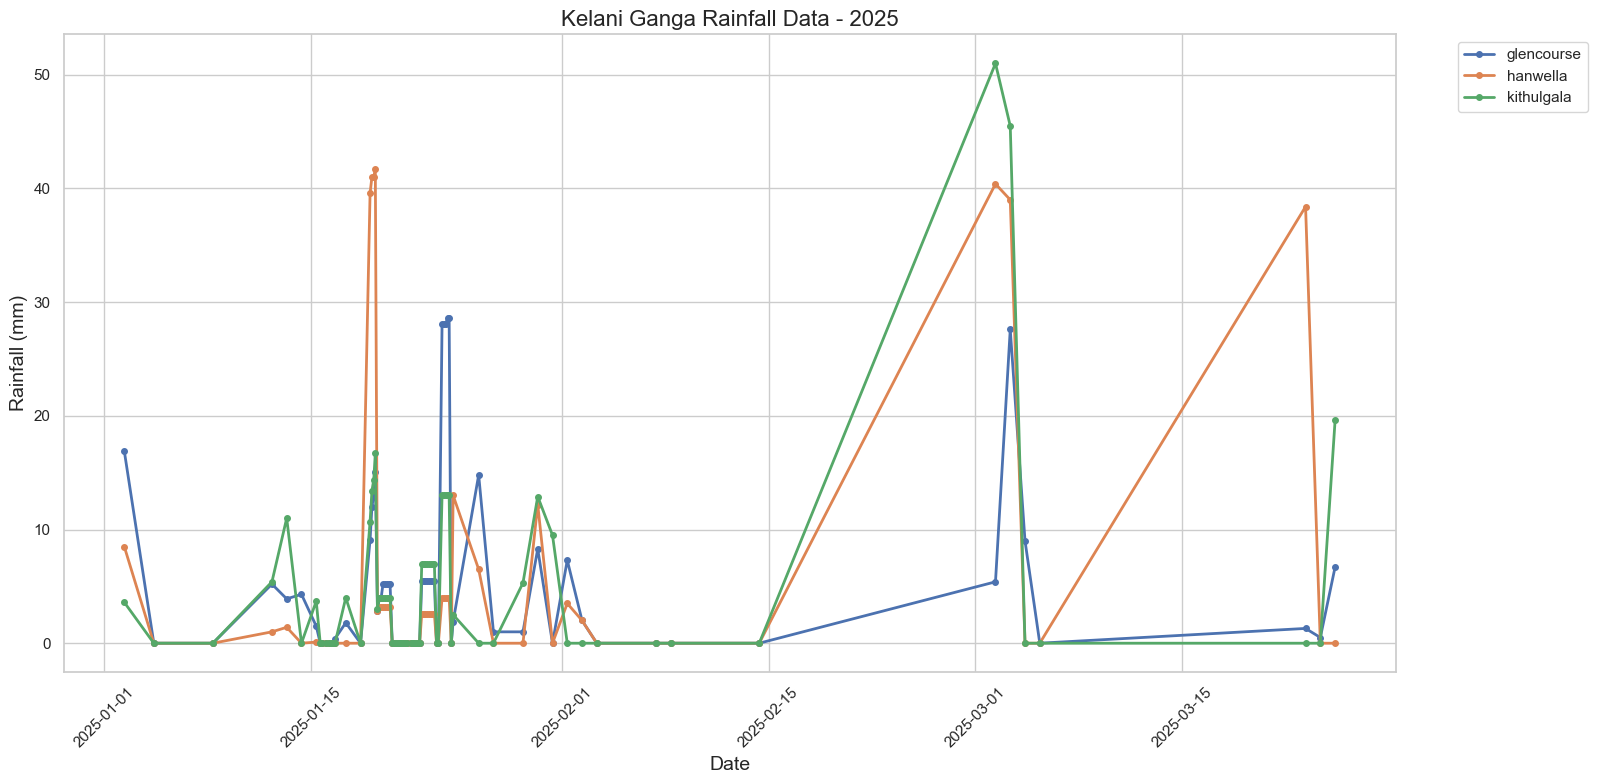

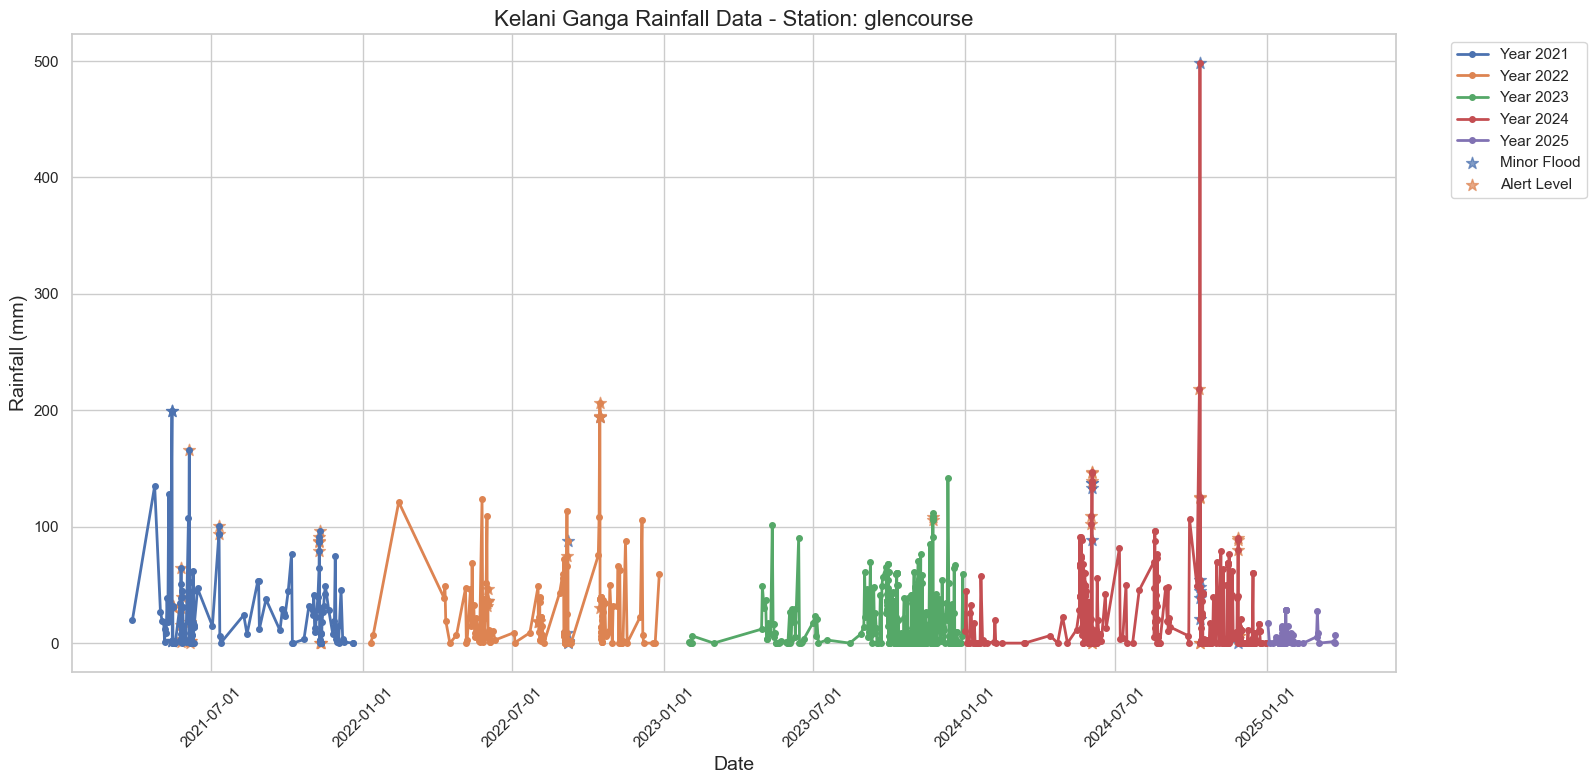

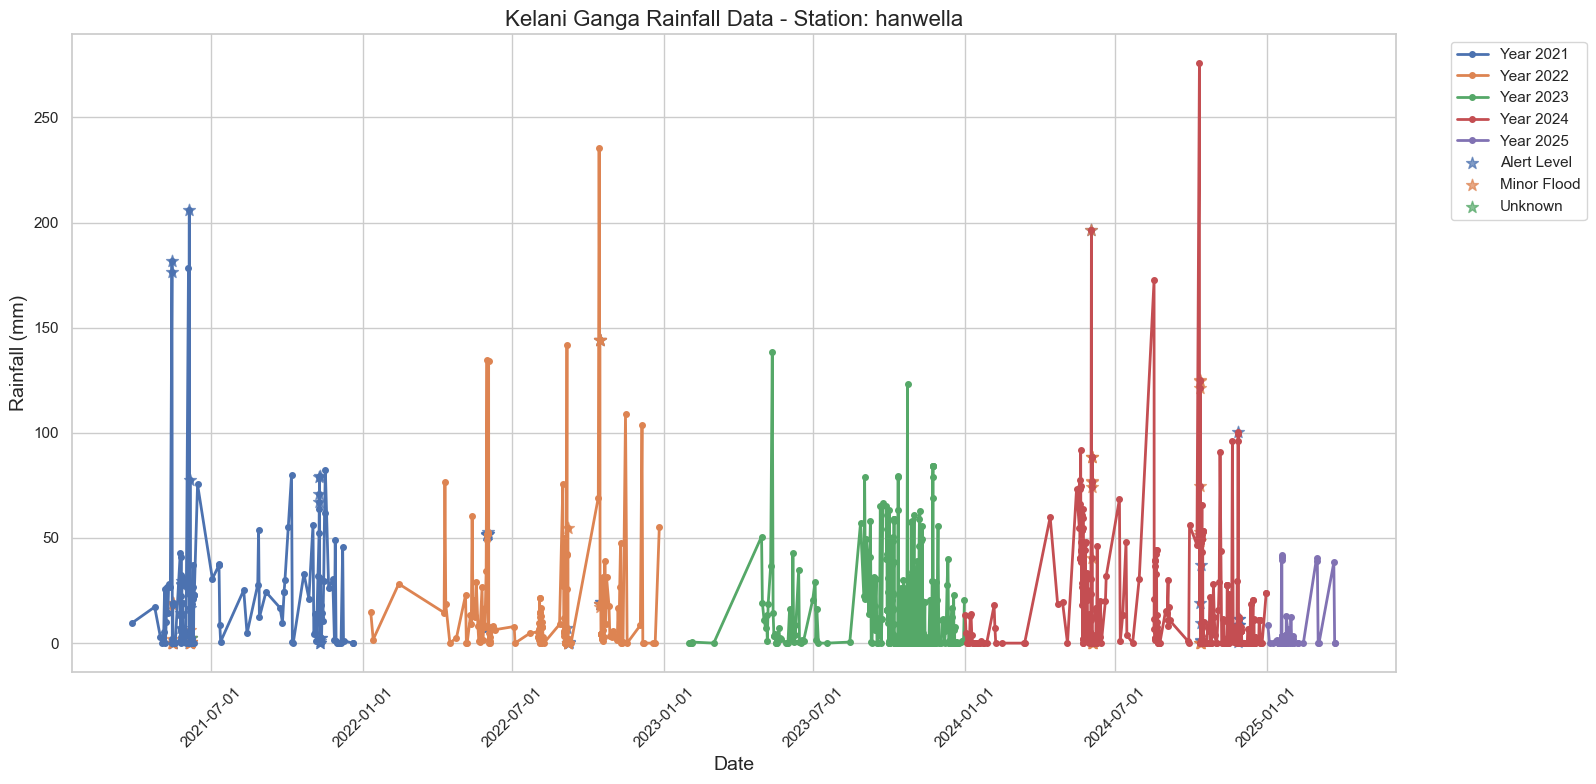

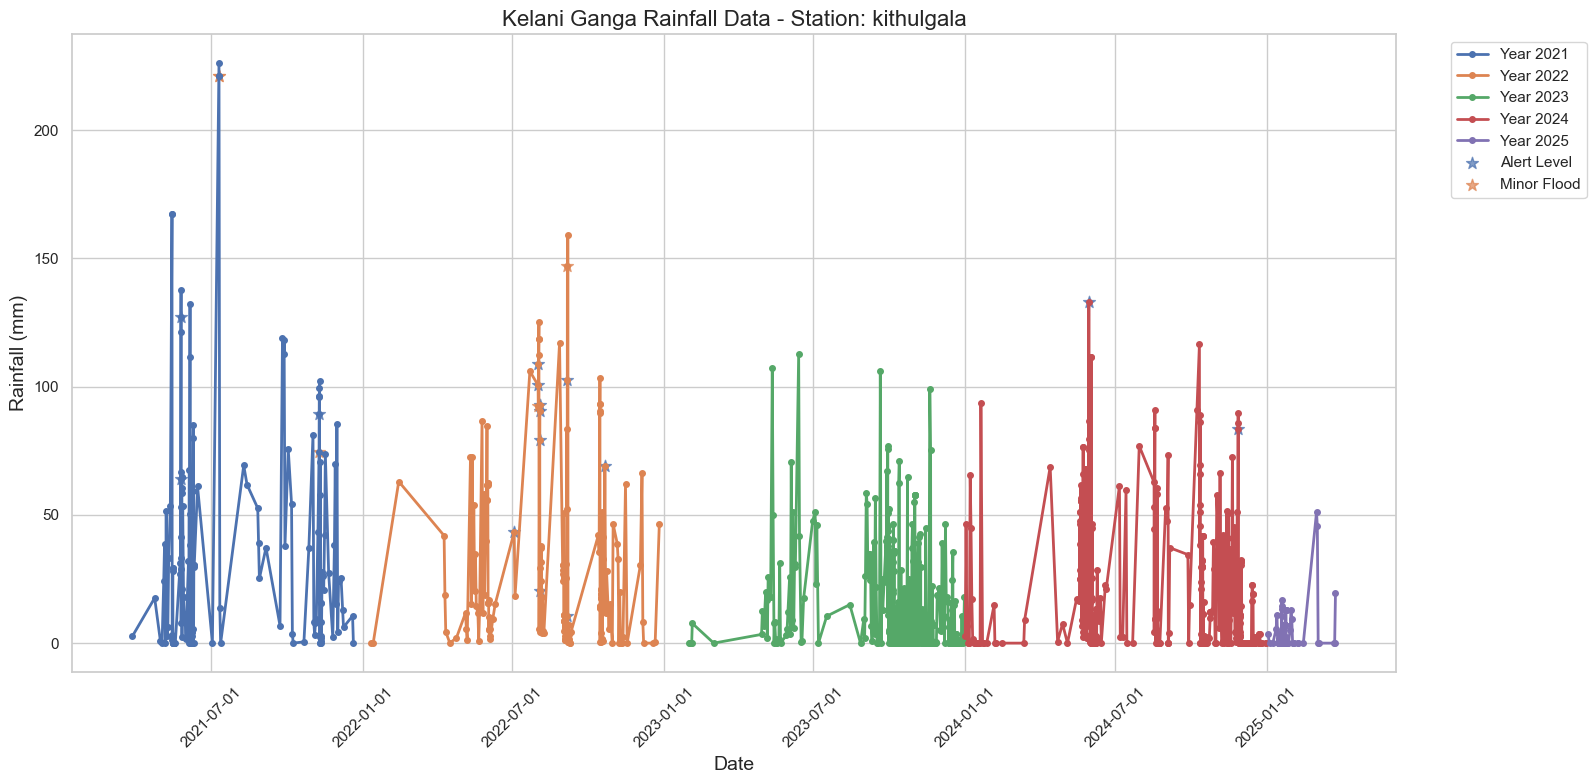

Generating water level visualizations by year...
Error: Year column not found in water level data

Rainfall Summary Statistics by Year:

Year: 2021
Total records: 471
Average rainfall: 27.63 mm
Maximum rainfall: 226.00 mm
Flood status counts:
flood_status
No Flood       391
Alert Level     54
Minor Flood     25
Unknown          1
Name: count, dtype: int64

Year: 2022
Total records: 543
Average rainfall: 25.87 mm
Maximum rainfall: 235.70 mm
Flood status counts:
flood_status
No Flood       471
Alert Level     49
Minor Flood     23
Name: count, dtype: int64

Year: 2023
Total records: 1197
Average rainfall: 15.42 mm
Maximum rainfall: 141.70 mm
Flood status counts:
flood_status
No Flood       1195
Alert Level       2
Name: count, dtype: int64

Year: 2024
Total records: 1266
Average rainfall: 20.33 mm
Maximum rainfall: 498.00 mm
Flood status counts:
flood_status
No Flood       1192
Alert Level      38
Minor Flood      36
Name: count, dtype: int64

Year: 2025
Total records: 234
Average rainfa

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np
from matplotlib.dates import DateFormatter
from datetime import datetime

# Set the style for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Base directories for the labeled data
base_dir = r'c:\Users\RushenSamodya\Documents\GitHub\Final_Year_Project\labeled_data'
rainfall_dir = os.path.join(base_dir, 'rainfall_data', 'kelani_ganga')
water_level_dir = os.path.join(base_dir, 'water_level_data', 'kelani_ganga')

# Function to load all CSV files from a directory
def load_all_csv_files(directory):
    all_dataframes = []
    
    # Check if directory exists
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist!")
        return pd.DataFrame()
    
    # Get all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory, '*.csv'))
    
    if not csv_files:
        print(f"No CSV files found in {directory}")
        return pd.DataFrame()
        
    for file in csv_files:
        station_name = os.path.basename(file).split('_')[0]
        try:
            df = pd.read_csv(file)
            df['station_name'] = station_name  # Add station name for identification
            all_dataframes.append(df)
        except Exception as e:
            print(f"Error loading {file}: {e}")
    
    if all_dataframes:
        return pd.concat(all_dataframes, ignore_index=True)
    else:
        return pd.DataFrame()

# Load the data
rainfall_data = load_all_csv_files(rainfall_dir)
water_level_data = load_all_csv_files(water_level_dir)

# Display the column names to diagnose the issue
print("Rainfall data columns:", rainfall_data.columns.tolist() if not rainfall_data.empty else "No data")
print("Water level data columns:", water_level_data.columns.tolist() if not water_level_data.empty else "No data")

# Check if we have data
if rainfall_data.empty:
    print("No rainfall data found for Kelani Ganga!")
else:
    print(f"Rainfall data loaded: {len(rainfall_data)} rows")
    print(f"Stations: {rainfall_data['station_name'].unique()}")

if water_level_data.empty:
    print("No water level data found for Kelani Ganga!")
else:
    print(f"Water level data loaded: {len(water_level_data)} rows")
    print(f"Stations: {water_level_data['station_name'].unique()}")

# Convert the date column to datetime format - handle potential column name differences
if not rainfall_data.empty:
    # Find a time/date column
    time_cols = [col for col in rainfall_data.columns if 'time' in col.lower() or 'date' in col.lower()]
    if time_cols:
        time_column = time_cols[0]
        print(f"Using '{time_column}' as time column for rainfall data")
        
        # Convert to datetime and extract year
        rainfall_data[time_column] = pd.to_datetime(rainfall_data[time_column], errors='coerce')
        rainfall_data['year'] = rainfall_data[time_column].dt.year
    else:
        print("Warning: Could not identify a time column in rainfall data")
        print("Available columns:", rainfall_data.columns.tolist())

if not water_level_data.empty:
    # Find a time/date column
    time_cols = [col for col in water_level_data.columns if 'time' in col.lower() or 'date' in col.lower()]
    if time_cols:
        time_column = time_cols[0]
        print(f"Using '{time_column}' as time column for water level data")
        
        # Convert to datetime and extract year
        water_level_data[time_column] = pd.to_datetime(water_level_data[time_column], errors='coerce')
        water_level_data['year'] = water_level_data[time_column].dt.year
    else:
        print("Warning: Could not identify a time column in water level data")
        print("Available columns:", water_level_data.columns.tolist())

# Function to create rainfall visualizations by year
def visualize_rainfall_by_year(rainfall_df):
    if rainfall_df.empty:
        print("No rainfall data to visualize")
        return
    
    # Check if year column was successfully created
    if 'year' not in rainfall_df.columns:
        print("Error: Year column not found in rainfall data")
        return
    
    # Find appropriate columns
    time_cols = [col for col in rainfall_df.columns if 'time' in col.lower() or 'date' in col.lower()]
    time_column = time_cols[0] if time_cols else None
    
    rainfall_cols = [col for col in rainfall_df.columns if 'rain' in col.lower()]
    rainfall_column = rainfall_cols[0] if rainfall_cols else None
    
    if not time_column or not rainfall_column:
        print(f"Error: Missing required columns. Available columns: {rainfall_df.columns.tolist()}")
        return
    
    years = sorted(rainfall_df['year'].dropna().unique())
    
    # Create visualizations for all stations by year
    for year in years:
        yearly_data = rainfall_df[rainfall_df['year'] == year]
        
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by station name and plot each station's data
        for station in sorted(yearly_data['station_name'].unique()):
            station_data = yearly_data[yearly_data['station_name'] == station]
            station_data = station_data.sort_values(time_column)
            ax.plot(station_data[time_column], station_data[rainfall_column], 
                    label=station, linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in yearly_data.columns:
            flood_data = yearly_data[yearly_data['flood_status'] != 'No Flood'].drop_duplicates([time_column, 'station_name'])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[rainfall_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Rainfall Data - {year}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Rainfall (mm)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    # Create individual visualizations for each station
    for station in sorted(rainfall_df['station_name'].unique()):
        station_data = rainfall_df[rainfall_df['station_name'] == station]
        
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by year and plot each year's data
        for year in sorted(station_data['year'].dropna().unique()):
            yearly_data = station_data[station_data['year'] == year]
            yearly_data = yearly_data.sort_values(time_column)
            ax.plot(yearly_data[time_column], yearly_data[rainfall_column], 
                    label=f'Year {year}', linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in station_data.columns:
            flood_data = station_data[station_data['flood_status'] != 'No Flood'].drop_duplicates([time_column])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[rainfall_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Rainfall Data - Station: {station}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Rainfall (mm)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Function to create water level visualizations by year
def visualize_water_level_by_year(water_level_df):
    if water_level_df.empty:
        print("No water level data to visualize")
        return
    
    # Check if year column was successfully created
    if 'year' not in water_level_df.columns:
        print("Error: Year column not found in water level data")
        return
    
    # Find appropriate columns
    time_cols = [col for col in water_level_df.columns if 'time' in col.lower() or 'date' in col.lower()]
    time_column = time_cols[0] if time_cols else None
    
    level_cols = [col for col in water_level_df.columns if 'level' in col.lower() or 'depth' in col.lower()]
    level_column = level_cols[0] if level_cols else None
    
    if not time_column or not level_column:
        print(f"Error: Missing required columns. Available columns: {water_level_df.columns.tolist()}")
        return
    
    years = sorted(water_level_df['year'].dropna().unique())
    
    # Create visualizations for all stations by year
    for year in years:
        yearly_data = water_level_df[water_level_df['year'] == year]
        
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by station name and plot each station's data
        for station in sorted(yearly_data['station_name'].unique()):
            station_data = yearly_data[yearly_data['station_name'] == station]
            station_data = station_data.sort_values(time_column)
            ax.plot(station_data[time_column], station_data[level_column], 
                    label=station, linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in yearly_data.columns:
            flood_data = yearly_data[yearly_data['flood_status'] != 'No Flood'].drop_duplicates([time_column, 'station_name'])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[level_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Water Level Data - {year}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Water Level (m)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    # Create individual visualizations for each station
    for station in sorted(water_level_df['station_name'].unique()):
        station_data = water_level_df[water_level_df['station_name'] == station]
        
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by year and plot each year's data
        for year in sorted(station_data['year'].dropna().unique()):
            yearly_data = station_data[station_data['year'] == year]
            yearly_data = yearly_data.sort_values(time_column)
            ax.plot(yearly_data[time_column], yearly_data[level_column], 
                    label=f'Year {year}', linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in station_data.columns:
            flood_data = station_data[station_data['flood_status'] != 'No Flood'].drop_duplicates([time_column])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[level_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Water Level Data - Station: {station}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Water Level (m)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Visualize the data by year
print("Generating rainfall visualizations by year...")
visualize_rainfall_by_year(rainfall_data)

print("Generating water level visualizations by year...")
visualize_water_level_by_year(water_level_data)

# Print summary statistics by year with robust column naming
print("\nRainfall Summary Statistics by Year:")
if not rainfall_data.empty and 'year' in rainfall_data.columns:
    # Find rainfall column
    rainfall_cols = [col for col in rainfall_data.columns if 'rain' in col.lower()]
    rainfall_measure = rainfall_cols[0] if rainfall_cols else None
    
    if rainfall_measure:
        for year in sorted(rainfall_data['year'].dropna().unique()):
            year_data = rainfall_data[rainfall_data['year'] == year]
            print(f"\nYear: {year}")
            print(f"Total records: {len(year_data)}")
            print(f"Average rainfall: {year_data[rainfall_measure].mean():.2f} mm")
            print(f"Maximum rainfall: {year_data[rainfall_measure].max():.2f} mm")
            if 'flood_status' in year_data.columns:
                print("Flood status counts:")
                print(year_data['flood_status'].value_counts())

print("\nWater Level Summary Statistics by Year:")
if not water_level_data.empty and 'year' in water_level_data.columns:
    # Find level column
    level_cols = [col for col in water_level_data.columns if 'level' in col.lower() or 'depth' in col.lower()]
    level_column = level_cols[0] if level_cols else None
    
    if level_column:
        for year in sorted(water_level_data['year'].dropna().unique()):
            year_data = water_level_data[water_level_data['year'] == year]
            print(f"\nYear: {year}")
            print(f"Total records: {len(year_data)}")
            print(f"Average water level: {year_data[level_column].mean():.2f} m")
            print(f"Maximum water level: {year_data[level_column].max():.2f} m")
            if 'flood_status' in year_data.columns:
                print("Flood status counts:")
                print(year_data['flood_status'].value_counts())

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np
from matplotlib.dates import DateFormatter
from datetime import datetime

# Set the style for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Create output directories for saving plots
output_dir = r'c:\Users\RushenSamodya\Documents\GitHub\Final_Year_Project\visalize-data\labled\plots'
rainfall_output_dir = os.path.join(output_dir, 'rainfall')
water_level_output_dir = os.path.join(output_dir, 'water_level')

# Create directories if they don't exist
for directory in [output_dir, rainfall_output_dir, water_level_output_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")

# Base directories for the labeled data
base_dir = r'c:\Users\RushenSamodya\Documents\GitHub\Final_Year_Project\labeled_data'
rainfall_dir = os.path.join(base_dir, 'rainfall_data', 'kelani_ganga')
water_level_dir = os.path.join(base_dir, 'water_level_data', 'kelani_ganga')

# Function to load all CSV files from a directory
def load_all_csv_files(directory):
    all_dataframes = []
    
    # Check if directory exists
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist!")
        return pd.DataFrame()
    
    # Get all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory, '*.csv'))
    
    if not csv_files:
        print(f"No CSV files found in {directory}")
        return pd.DataFrame()
        
    for file in csv_files:
        station_name = os.path.basename(file).split('_')[0]
        try:
            df = pd.read_csv(file)
            df['station_name'] = station_name  # Add station name for identification
            all_dataframes.append(df)
        except Exception as e:
            print(f"Error loading {file}: {e}")
    
    if all_dataframes:
        return pd.concat(all_dataframes, ignore_index=True)
    else:
        return pd.DataFrame()

# Load the data
rainfall_data = load_all_csv_files(rainfall_dir)
water_level_data = load_all_csv_files(water_level_dir)

# Display the column names to diagnose the issue
print("Rainfall data columns:", rainfall_data.columns.tolist() if not rainfall_data.empty else "No data")
print("Water level data columns:", water_level_data.columns.tolist() if not water_level_data.empty else "No data")

# Check if we have data
if rainfall_data.empty:
    print("No rainfall data found for Kelani Ganga!")
else:
    print(f"Rainfall data loaded: {len(rainfall_data)} rows")
    print(f"Stations: {rainfall_data['station_name'].unique()}")

if water_level_data.empty:
    print("No water level data found for Kelani Ganga!")
else:
    print(f"Water level data loaded: {len(water_level_data)} rows")
    print(f"Stations: {water_level_data['station_name'].unique()}")

# Convert the date column to datetime format - handle potential column name differences
if not rainfall_data.empty:
    # Find a time/date column
    time_cols = [col for col in rainfall_data.columns if 'time' in col.lower() or 'date' in col.lower()]
    if time_cols:
        time_column = time_cols[0]
        print(f"Using '{time_column}' as time column for rainfall data")
        
        # Convert to datetime and extract year
        rainfall_data[time_column] = pd.to_datetime(rainfall_data[time_column], errors='coerce')
        rainfall_data['year'] = rainfall_data[time_column].dt.year
    else:
        print("Warning: Could not identify a time column in rainfall data")
        print("Available columns:", rainfall_data.columns.tolist())

if not water_level_data.empty:
    # Find a time/date column
    time_cols = [col for col in water_level_data.columns if 'time' in col.lower() or 'date' in col.lower()]
    if time_cols:
        time_column = time_cols[0]
        print(f"Using '{time_column}' as time column for water level data")
        
        # Convert to datetime and extract year
        water_level_data[time_column] = pd.to_datetime(water_level_data[time_column], errors='coerce')
        water_level_data['year'] = water_level_data[time_column].dt.year
    else:
        print("Warning: Could not identify a time column in water level data")
        print("Available columns:", water_level_data.columns.tolist())

# Function to create rainfall visualizations by year and save them
def visualize_rainfall_by_year(rainfall_df):
    if rainfall_df.empty:
        print("No rainfall data to visualize")
        return
    
    # Check if year column was successfully created
    if 'year' not in rainfall_df.columns:
        print("Error: Year column not found in rainfall data")
        return
    
    # Find appropriate columns
    time_cols = [col for col in rainfall_df.columns if 'time' in col.lower() or 'date' in col.lower()]
    time_column = time_cols[0] if time_cols else None
    
    rainfall_cols = [col for col in rainfall_df.columns if 'rain' in col.lower()]
    rainfall_column = rainfall_cols[0] if rainfall_cols else None
    
    if not time_column or not rainfall_column:
        print(f"Error: Missing required columns. Available columns: {rainfall_df.columns.tolist()}")
        return
    
    years = sorted(rainfall_df['year'].dropna().unique())
    
    # Create separate visualizations for each year with all stations
    for year in years:
        yearly_data = rainfall_df[rainfall_df['year'] == year]
        year_dir = os.path.join(rainfall_output_dir, f'year_{int(year)}')
        
        # Create year directory if it doesn't exist
        if not os.path.exists(year_dir):
            os.makedirs(year_dir)
        
        # Create visualization with all stations for this year
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by station name and plot each station's data
        for station in sorted(yearly_data['station_name'].unique()):
            station_data = yearly_data[yearly_data['station_name'] == station]
            station_data = station_data.sort_values(time_column)
            ax.plot(station_data[time_column], station_data[rainfall_column], 
                    label=station, linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in yearly_data.columns:
            flood_data = yearly_data[yearly_data['flood_status'] != 'No Flood'].drop_duplicates([time_column, 'station_name'])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[rainfall_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Rainfall Data - {int(year)}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Rainfall (mm)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        
        # Save the figure
        file_path = os.path.join(year_dir, f'all_stations_rainfall_{int(year)}.png')
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {file_path}")
        plt.close()
        
        # Create separate visualizations for each station in this year
        for station in sorted(yearly_data['station_name'].unique()):
            station_data = yearly_data[yearly_data['station_name'] == station]
            station_data = station_data.sort_values(time_column)
            
            # Skip if not enough data
            if len(station_data) < 2:
                continue
                
            fig, ax = plt.subplots(figsize=(16, 8))
            
            ax.plot(station_data[time_column], station_data[rainfall_column], 
                    label=station, linewidth=2, marker='o', markersize=4)
            
            # Add flood status markers for visual reference
            if 'flood_status' in station_data.columns:
                flood_data = station_data[station_data['flood_status'] != 'No Flood'].drop_duplicates([time_column])
                
                for status in flood_data['flood_status'].unique():
                    status_data = flood_data[flood_data['flood_status'] == status]
                    ax.scatter(status_data[time_column], status_data[rainfall_column], 
                               label=f'{status}', s=80, alpha=0.7, marker='*')
            
            ax.set_title(f'Kelani Ganga Rainfall Data - {int(year)} - Station: {station}', fontsize=16)
            ax.set_xlabel('Date', fontsize=14)
            ax.set_ylabel('Rainfall (mm)', fontsize=14)
            ax.grid(True)
            
            # Format x-axis date labels
            date_format = DateFormatter("%Y-%m-%d")
            ax.xaxis.set_major_formatter(date_format)
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            
            # Save the figure
            file_path = os.path.join(year_dir, f'station_{station}_rainfall_{int(year)}.png')
            plt.savefig(file_path, dpi=300, bbox_inches='tight')
            print(f"Saved: {file_path}")
            plt.close()
    
    # Create separate visualizations for each station with all years
    for station in sorted(rainfall_df['station_name'].unique()):
        station_data = rainfall_df[rainfall_df['station_name'] == station]
        station_dir = os.path.join(rainfall_output_dir, f'station_{station}')
        
        # Create station directory if it doesn't exist
        if not os.path.exists(station_dir):
            os.makedirs(station_dir)
        
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by year and plot each year's data
        for year in sorted(station_data['year'].dropna().unique()):
            yearly_data = station_data[station_data['year'] == year]
            yearly_data = yearly_data.sort_values(time_column)
            
            # Skip if not enough data
            if len(yearly_data) < 2:
                continue
                
            ax.plot(yearly_data[time_column], yearly_data[rainfall_column], 
                    label=f'Year {int(year)}', linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in station_data.columns:
            flood_data = station_data[station_data['flood_status'] != 'No Flood'].drop_duplicates([time_column])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[rainfall_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Rainfall Data - Station: {station}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Rainfall (mm)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        
        # Save the figure
        file_path = os.path.join(station_dir, f'station_{station}_all_years_rainfall.png')
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {file_path}")
        plt.close()

# Function to create water level visualizations by year and save them
def visualize_water_level_by_year(water_level_df):
    if water_level_df.empty:
        print("No water level data to visualize")
        return
    
    # Check if year column was successfully created
    if 'year' not in water_level_df.columns:
        print("Error: Year column not found in water level data")
        return
    
    # Find appropriate columns
    time_cols = [col for col in water_level_df.columns if 'time' in col.lower() or 'date' in col.lower()]
    time_column = time_cols[0] if time_cols else None
    
    level_cols = [col for col in water_level_df.columns if 'level' in col.lower() or 'depth' in col.lower()]
    level_column = level_cols[0] if level_cols else None
    
    if not time_column or not level_column:
        print(f"Error: Missing required columns. Available columns: {water_level_df.columns.tolist()}")
        return
    
    years = sorted(water_level_df['year'].dropna().unique())
    
    # Create separate visualizations for each year with all stations
    for year in years:
        yearly_data = water_level_df[water_level_df['year'] == year]
        year_dir = os.path.join(water_level_output_dir, f'year_{int(year)}')
        
        # Create year directory if it doesn't exist
        if not os.path.exists(year_dir):
            os.makedirs(year_dir)
        
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by station name and plot each station's data
        for station in sorted(yearly_data['station_name'].unique()):
            station_data = yearly_data[yearly_data['station_name'] == station]
            station_data = station_data.sort_values(time_column)
            ax.plot(station_data[time_column], station_data[level_column], 
                    label=station, linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in yearly_data.columns:
            flood_data = yearly_data[yearly_data['flood_status'] != 'No Flood'].drop_duplicates([time_column, 'station_name'])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[level_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Water Level Data - {int(year)}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Water Level (m)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        
        # Save the figure
        file_path = os.path.join(year_dir, f'all_stations_water_level_{int(year)}.png')
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {file_path}")
        plt.close()
        
        # Create separate visualizations for each station in this year
        for station in sorted(yearly_data['station_name'].unique()):
            station_data = yearly_data[yearly_data['station_name'] == station]
            station_data = station_data.sort_values(time_column)
            
            # Skip if not enough data
            if len(station_data) < 2:
                continue
                
            fig, ax = plt.subplots(figsize=(16, 8))
            
            ax.plot(station_data[time_column], station_data[level_column], 
                    label=station, linewidth=2, marker='o', markersize=4)
            
            # Add flood status markers for visual reference
            if 'flood_status' in station_data.columns:
                flood_data = station_data[station_data['flood_status'] != 'No Flood'].drop_duplicates([time_column])
                
                for status in flood_data['flood_status'].unique():
                    status_data = flood_data[flood_data['flood_status'] == status]
                    ax.scatter(status_data[time_column], status_data[level_column], 
                               label=f'{status}', s=80, alpha=0.7, marker='*')
            
            ax.set_title(f'Kelani Ganga Water Level Data - {int(year)} - Station: {station}', fontsize=16)
            ax.set_xlabel('Date', fontsize=14)
            ax.set_ylabel('Water Level (m)', fontsize=14)
            ax.grid(True)
            
            # Format x-axis date labels
            date_format = DateFormatter("%Y-%m-%d")
            ax.xaxis.set_major_formatter(date_format)
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            
            # Save the figure
            file_path = os.path.join(year_dir, f'station_{station}_water_level_{int(year)}.png')
            plt.savefig(file_path, dpi=300, bbox_inches='tight')
            print(f"Saved: {file_path}")
            plt.close()
    
    # Create separate visualizations for each station with all years
    for station in sorted(water_level_df['station_name'].unique()):
        station_data = water_level_df[water_level_df['station_name'] == station]
        station_dir = os.path.join(water_level_output_dir, f'station_{station}')
        
        # Create station directory if it doesn't exist
        if not os.path.exists(station_dir):
            os.makedirs(station_dir)
        
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Group by year and plot each year's data
        for year in sorted(station_data['year'].dropna().unique()):
            yearly_data = station_data[station_data['year'] == year]
            yearly_data = yearly_data.sort_values(time_column)
            
            # Skip if not enough data
            if len(yearly_data) < 2:
                continue
                
            ax.plot(yearly_data[time_column], yearly_data[level_column], 
                    label=f'Year {int(year)}', linewidth=2, marker='o', markersize=4)
        
        # Add flood status markers for visual reference
        if 'flood_status' in station_data.columns:
            flood_data = station_data[station_data['flood_status'] != 'No Flood'].drop_duplicates([time_column])
            
            for status in flood_data['flood_status'].unique():
                status_data = flood_data[flood_data['flood_status'] == status]
                ax.scatter(status_data[time_column], status_data[level_column], 
                           label=f'{status}', s=80, alpha=0.7, marker='*')
        
        ax.set_title(f'Kelani Ganga Water Level Data - Station: {station}', fontsize=16)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Water Level (m)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        
        # Format x-axis date labels
        date_format = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        
        # Save the figure
        file_path = os.path.join(station_dir, f'station_{station}_all_years_water_level.png')
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {file_path}")
        plt.close()

# Generate and save all visualizations
print("Generating and saving rainfall visualizations by year and station...")
visualize_rainfall_by_year(rainfall_data)

print("Generating and saving water level visualizations by year and station...")
visualize_water_level_by_year(water_level_data)

# Print summary statistics by year
print("\nRainfall Summary Statistics by Year:")
if not rainfall_data.empty and 'year' in rainfall_data.columns:
    # Find rainfall column
    rainfall_cols = [col for col in rainfall_data.columns if 'rain' in col.lower()]
    rainfall_measure = rainfall_cols[0] if rainfall_cols else None
    
    if rainfall_measure:
        for year in sorted(rainfall_data['year'].dropna().unique()):
            year_data = rainfall_data[rainfall_data['year'] == year]
            print(f"\nYear: {int(year)}")
            print(f"Total records: {len(year_data)}")
            print(f"Average rainfall: {year_data[rainfall_measure].mean():.2f} mm")
            print(f"Maximum rainfall: {year_data[rainfall_measure].max():.2f} mm")
            if 'flood_status' in year_data.columns:
                print("Flood status counts:")
                print(year_data['flood_status'].value_counts())

print("\nWater Level Summary Statistics by Year:")
if not water_level_data.empty and 'year' in water_level_data.columns:
    # Find level column
    level_cols = [col for col in water_level_data.columns if 'level' in col.lower() or 'depth' in col.lower()]
    level_column = level_cols[0] if level_cols else None
    
    if level_column:
        for year in sorted(water_level_data['year'].dropna().unique()):
            year_data = water_level_data[water_level_data['year'] == year]
            print(f"\nYear: {int(year)}")
            print(f"Total records: {len(year_data)}")
            print(f"Average water level: {year_data[level_column].mean():.2f} m")
            print(f"Maximum water level: {year_data[level_column].max():.2f} m")
            if 'flood_status' in year_data.columns:
                print("Flood status counts:")
                print(year_data['flood_status'].value_counts())

print(f"\nAll visualizations have been saved to: {output_dir}")
print(f"- Rainfall plots: {rainfall_output_dir}")
print(f"- Water level plots: {water_level_output_dir}")

Created directory: c:\Users\RushenSamodya\Documents\GitHub\Final_Year_Project\visalize-data\labled\plots
Created directory: c:\Users\RushenSamodya\Documents\GitHub\Final_Year_Project\visalize-data\labled\plots\rainfall
Created directory: c:\Users\RushenSamodya\Documents\GitHub\Final_Year_Project\visalize-data\labled\plots\water_level
Rainfall data columns: ['end_time', 'duration_hours', 'rainfall_in_mm', 'flood_status', 'station_id', 'station_name']
Water level data columns: ['recorded_at', 'unit', 'water_level', 'flood_status', 'station_name']
Rainfall data loaded: 3711 rows
Stations: ['glencourse' 'hanwella' 'kithulgala']
Water level data loaded: 9868 rows
Stations: ['glencourse' 'hanwella' 'kithulgala' 'nagalagam']
Using 'end_time' as time column for rainfall data
Available columns: ['recorded_at', 'unit', 'water_level', 'flood_status', 'station_name']
Generating and saving rainfall visualizations by year and station...
Saved: c:\Users\RushenSamodya\Documents\GitHub\Final_Year_Proje